<a href="https://colab.research.google.com/github/Subhas-1130/Subhas-demo/blob/main/Copy_of_ML_1st_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [24]:

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (Malignant = 0, Benign = 1)

In [25]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Gaussian Naive Bayes
gnb = GaussianNB( priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [27]:
# Multinomial Naive Bayes (requires non-negative features)
mnb = MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [28]:
# Bernoulli Naive Bayes (requires binary features)
# Convert features to binary for Bernoulli Naive Bayes
X_train_bin = np.where(X_train > 0, 1, 0)
X_test_bin = np.where(X_test > 0, 1, 0)

bnb = BernoulliNB(alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

In [29]:
# Calculate metrics for each classifier
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

In [30]:
# Gaussian Naive Bayes metrics
accuracy_gnb, precision_gnb, recall_gnb, f1_gnb, cm_gnb = calculate_metrics(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Results")
print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"Precision: {precision_gnb:.4f}")
print(f"Recall: {recall_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print("Confusion Matrix:")
print(cm_gnb)

Gaussian Naive Bayes Results
Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
F1-Score: 0.9793
Confusion Matrix:
[[40  3]
 [ 0 71]]


In [31]:
# Multinomial Naive Bayes metrics
accuracy_mnb, precision_mnb, recall_mnb, f1_mnb, cm_mnb = calculate_metrics(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes Results")
print(f"Accuracy: {accuracy_mnb:.4f}")
print(f"Precision: {precision_mnb:.4f}")
print(f"Recall: {recall_mnb:.4f}")
print(f"F1-Score: {f1_mnb:.4f}")
print("Confusion Matrix:")
print(cm_mnb)



Multinomial Naive Bayes Results
Accuracy: 0.9386
Precision: 0.9103
Recall: 1.0000
F1-Score: 0.9530
Confusion Matrix:
[[36  7]
 [ 0 71]]


In [32]:

# Bernoulli Naive Bayes metrics
accuracy_bnb, precision_bnb, recall_bnb, f1_bnb, cm_bnb = calculate_metrics(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Results")
print(f"Accuracy: {accuracy_bnb:.4f}")
print(f"Precision: {precision_bnb:.4f}")
print(f"Recall: {recall_bnb:.4f}")
print(f"F1-Score: {f1_bnb:.4f}")
print("Confusion Matrix:")
print(cm_bnb)


Bernoulli Naive Bayes Results
Accuracy: 0.6228
Precision: 0.6228
Recall: 1.0000
F1-Score: 0.7676
Confusion Matrix:
[[ 0 43]
 [ 0 71]]


In [38]:
# Split dataset into train and test sets (80% train, 20% test)
acc = []
splits = []
for i in range(1,6):
  # print(i/10)
  splits.append(i/10)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)
  gnb = GaussianNB( priors=None, var_smoothing=1e-09)
  gnb.fit(X_train, y_train)
  y_pred_gnb = gnb.predict(X_test)
  accuracy_gnb, precision_gnb, recall_gnb, f1_gnb, cm_gnb = calculate_metrics(y_test, y_pred_gnb)
  print("Gaussian Naive Bayes Results")
  print(f"Accuracy: {accuracy_gnb:.4f}")
  print(f"Precision: {precision_gnb:.4f}")
  print(f"Recall: {recall_gnb:.4f}")
  print(f"F1-Score: {f1_gnb:.4f}")
  print("Confusion Matrix:")
  print(cm_gnb)
  acc.append(accuracy_gnb)


Gaussian Naive Bayes Results
Accuracy: 0.9825
Precision: 0.9756
Recall: 1.0000
F1-Score: 0.9877
Confusion Matrix:
[[16  1]
 [ 0 40]]
Gaussian Naive Bayes Results
Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
F1-Score: 0.9793
Confusion Matrix:
[[40  3]
 [ 0 71]]
Gaussian Naive Bayes Results
Accuracy: 0.9415
Precision: 0.9455
Recall: 0.9630
F1-Score: 0.9541
Confusion Matrix:
[[ 57   6]
 [  4 104]]
Gaussian Naive Bayes Results
Accuracy: 0.9518
Precision: 0.9536
Recall: 0.9730
F1-Score: 0.9632
Confusion Matrix:
[[ 73   7]
 [  4 144]]
Gaussian Naive Bayes Results
Accuracy: 0.9439
Precision: 0.9524
Recall: 0.9626
F1-Score: 0.9574
Confusion Matrix:
[[ 89   9]
 [  7 180]]


In [39]:
acc

[0.9824561403508771,
 0.9736842105263158,
 0.9415204678362573,
 0.9517543859649122,
 0.9438596491228071]

In [40]:
splits

[0.1, 0.2, 0.3, 0.4, 0.5]

<BarContainer object of 5 artists>

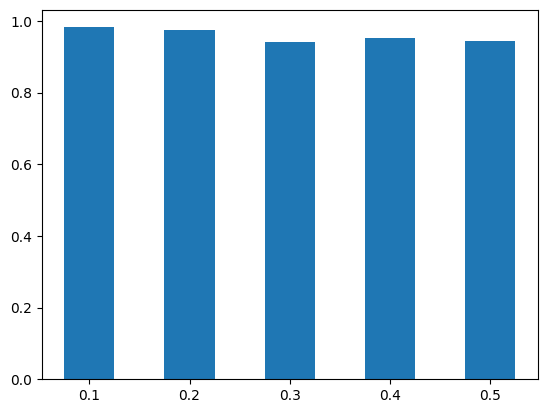

In [48]:
import matplotlib.pyplot as plt
plt.bar(splits,acc,width=0.05)